In [1]:
import matplotlib.pyplot as plt
from ptycho import params as p

p.cfg['data_source'] = 'lines'
p.cfg['n_filters_scale'] = 1
p.cfg['gridsize'] = 2
offset = p.cfg['offset']

from ptycho.generate_data import *

from ptycho import baselines as bl
# from importlib import reload
# reload(bl)
baseline_model_overlap = bl.train((X_train[:, :, :, :4]),
                          Y_I_train[:, :, :, :4], Y_phi_train[:, :, :, :4])

baseline_overlap_pred_I, baseline_overlap_pred_phi = baseline_model_overlap.predict(
    [X_test[:, :, :, :4]  * bl.params.params()['intensity_scale']])
baseline_overlap_stitched = stitch(baseline_overlap_pred_I[:, :, :, :1], norm_Y_I_test)


# For comparison to ground truth we need to shift by half the offset value
def xyshift(arr2d, dx, dy):
    arr2d = np.roll(arr2d, dx, axis = 0)
    arr2d = np.roll(arr2d, dy, axis = 1)
    return arr2d

YY_baseline_overlap = xyshift(baseline_overlap_stitched[0], -offset // 2, -offset // 2)

2023-04-17 15:39:41.212105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 15:39:41.303198: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-17 15:39:41.648816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2023-04-17 15:39:41.648859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin

simulating gaussian position jitter, scale 0.0
Using provided scan point offsets
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
simulating gaussian position jitter, scale 0.0
Using provided scan point offsets
0.99999416
nphoton 8.964051
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   1184        ['input_1[0][0]']                
                                                                     

2023-04-17 15:41:09.415982: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


366/366 [==============================] - 7s 13ms/step - loss: 0.0608 - conv2d_12_loss: 0.0358 - conv2d_19_loss: 0.0249 - val_loss: 0.0065 - val_conv2d_12_loss: 0.0064 - val_conv2d_19_loss: 1.0088e-04 - lr: 0.0010
Epoch 2/60
366/366 [==============================] - 4s 12ms/step - loss: 0.0059 - conv2d_12_loss: 0.0059 - conv2d_19_loss: 9.0167e-05 - val_loss: 0.0067 - val_conv2d_12_loss: 0.0067 - val_conv2d_19_loss: 4.5049e-05 - lr: 0.0010
Epoch 3/60
366/366 [==============================] - 4s 11ms/step - loss: 0.0052 - conv2d_12_loss: 0.0051 - conv2d_19_loss: 7.2460e-05 - val_loss: 0.0054 - val_conv2d_12_loss: 0.0053 - val_conv2d_19_loss: 9.7106e-05 - lr: 0.0010
Epoch 4/60
366/366 [==============================] - 4s 11ms/step - loss: 0.0049 - conv2d_12_loss: 0.0048 - conv2d_19_loss: 7.2829e-05 - val_loss: 0.0042 - val_conv2d_12_loss: 0.0041 - val_conv2d_19_loss: 9.4630e-05 - lr: 0.0010
Epoch 5/60
366/366 [==============================] - 4s 11ms/step - loss: 0.0046 - conv2d_12_l

Epoch 33/60
366/366 [==============================] - 6s 17ms/step - loss: 0.0023 - conv2d_12_loss: 0.0023 - conv2d_19_loss: 1.3253e-05 - val_loss: 0.0023 - val_conv2d_12_loss: 0.0023 - val_conv2d_19_loss: 1.4280e-05 - lr: 1.0000e-04
Epoch 34/60
366/366 [==============================] - 6s 17ms/step - loss: 0.0023 - conv2d_12_loss: 0.0023 - conv2d_19_loss: 1.3171e-05 - val_loss: 0.0023 - val_conv2d_12_loss: 0.0023 - val_conv2d_19_loss: 5.7166e-06 - lr: 1.0000e-04
Epoch 35/60
366/366 [==============================] - 6s 17ms/step - loss: 0.0023 - conv2d_12_loss: 0.0023 - conv2d_19_loss: 1.3026e-05 - val_loss: 0.0023 - val_conv2d_12_loss: 0.0022 - val_conv2d_19_loss: 2.0119e-05 - lr: 1.0000e-04
Epoch 36/60
366/366 [==============================] - 6s 17ms/step - loss: 0.0022 - conv2d_12_loss: 0.0022 - conv2d_19_loss: 1.3273e-05 - val_loss: 0.0023 - val_conv2d_12_loss: 0.0022 - val_conv2d_19_loss: 2.0766e-05 - lr: 1.0000e-04
Epoch 37/60
366/366 [==============================] - 6s 17

In [2]:
mae(trim(YY_ground_truth), trim(YY_baseline_overlap))

mean scale adjustment: 0.23314087


0.016764656

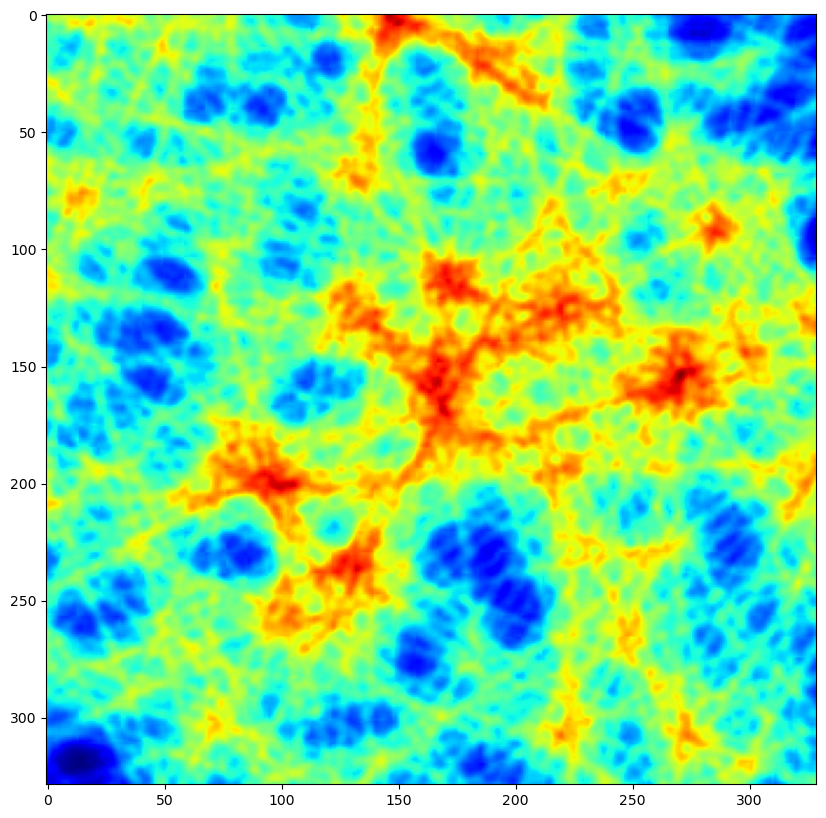

In [3]:
# reconstruction
plt.rcParams["figure.figsize"] = (10, 10)

plt.imshow(trim(YY_baseline_overlap), cmap = 'jet')

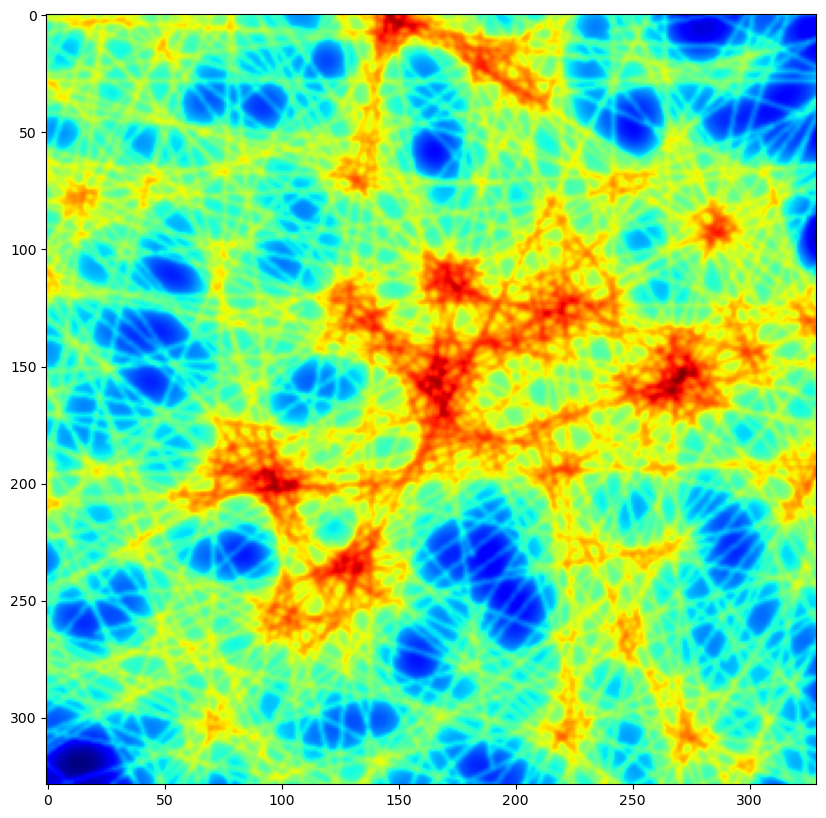

In [4]:
plt.imshow(trim(YY_ground_truth), cmap = 'jet')